<h1><center>CSCI6515 - Machine learning for Big Data</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Sagar Devesh</b>  
<b>B00905507</b>

In [154]:
import pandas as pd
import numpy as np 
import datetime as date 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [155]:
# importing pm2.5 dataset
pm_data = pd.read_csv('Nova_Scotia_Provincial_Ambient_Fine_Particulate_Matter__PM2.5__Hourly_Data_Halifax_BAM_T640.csv')
pm_data

,Date & time,Pollutant,Unit,Station,Instrument,Average
0,01/25/2021 11:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,3.1
1,01/25/2021 11:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,3.4
2,01/25/2021 12:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,NaN
3,01/25/2021 12:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,3.3
4,01/26/2006 01:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
...,...,...,...,...,...,...
140250,12/31/2021 10:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,5.1
140251,12/31/2021 11:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,6.3
140252,12/31/2021 11:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,4.7
140253,12/31/2021 12:00:00 AM,PM2.5,µg/m3,Halifax Johnston,API T640,6.1


In [156]:
# importing the traffic volume dataset
traffic_data = pd.read_csv('Traffic_Volumes_-_Provincial_Highway_System.csv')
traffic_data.head()

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
0,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2733.0,2550.0,NaN,NaN,NaN
1,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,4.0,1774.0,1350.0,W,NaN,NaN
2,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,4.0,1396.0,1310.0,E,NaN,NaN
3,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2350.0,2460.0,NaN,NaN,NaN
4,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.0,2430.0,NaN,NaN,NaN


### Data Preprocessing

### Preprocessing the PM2.5 dataset


In [157]:
# converting "Date & Time" to datetime datatype
pm_data["Date & time"] = pd.to_datetime(pm_data["Date & time"])

In [158]:
# Creating a new column 'year' for filtering the 2019 data in the next step
pm_data['year'] = pm_data['Date & time'].dt.year
pm_data

,Date & time,Pollutant,Unit,Station,Instrument,Average,year
0,2021-01-25 11:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,3.1,2021
1,2021-01-25 23:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,3.4,2021
2,2021-01-25 00:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,NaN,2021
3,2021-01-25 12:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,3.3,2021
4,2006-01-26 01:00:00,PM2.5,µg/m3,Halifax,BAM 1020,NaN,2006
...,...,...,...,...,...,...,...
140250,2021-12-31 22:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,5.1,2021
140251,2021-12-31 11:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,6.3,2021
140252,2021-12-31 23:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,4.7,2021
140253,2021-12-31 00:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,6.1,2021


Filtering out the pm_data to get information only for the year 2019

In [159]:
pm_data_1 = pm_data[pm_data['year']==2019]
pm_data_1
    

,Date & time,Pollutant,Unit,Station,Instrument,Average,year
326,2019-01-01 01:00:00,PM2.5,µg/m3,Halifax Johnston,BAM 1020,10.0,2019
327,2019-01-01 13:00:00,PM2.5,µg/m3,Halifax Johnston,BAM 1020,0.0,2019
328,2019-01-01 02:00:00,PM2.5,µg/m3,Halifax Johnston,BAM 1020,8.0,2019
329,2019-01-01 14:00:00,PM2.5,µg/m3,Halifax Johnston,BAM 1020,1.0,2019
330,2019-01-01 03:00:00,PM2.5,µg/m3,Halifax Johnston,BAM 1020,5.0,2019
...,...,...,...,...,...,...,...
140202,2019-12-31 22:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,6.2,2019
140203,2019-12-31 11:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,7.1,2019
140204,2019-12-31 23:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,9.2,2019
140205,2019-12-31 00:00:00,PM2.5,µg/m3,Halifax Johnston,API T640,6.8,2019


### Continuous Feature report

Continous features report includes the following -
1. Minimum
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Maximum
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - Number of unqiue values for a given feature

In [160]:
def build_continuous_features_report(pm_data):
    stats = {
    "Count": len,
    "Miss %": lambda churn_df: churn_df.isna().sum() / len(churn_df) * 100,
    "Card.": lambda churn_df: churn_df.nunique(),
    "Min": lambda churn_df: churn_df.min(),
    "1st Qrt.": lambda churn_df: churn_df.quantile(0.25),
    "Mean": lambda churn_df: churn_df.mean(),
    "Median": lambda churn_df: churn_df.median(),
    "3rd Qrt": lambda churn_df: churn_df.quantile(0.75),
    "Max": lambda churn_df: churn_df.max(),
    "Std. Dev.": lambda churn_df: churn_df.std(),
    }
    contin_feat_names = pm_data.select_dtypes("number").columns
    continuous_data_df = pm_data[contin_feat_names]
    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())
    for stat_name, fn in stats.items():
    # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)
    return report_df

In [161]:
build_continuous_features_report(pm_data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Average,140255,20.313001,447,-0.4,2.9,5.610501,4.7,7.3,145.5,4.594625
year,140255,0.000000,16,2006.0,2010.0,2013.500396,2014.0,2017.5,2021.0,4.609687


### Dropping the missing values

In [162]:
# Checking for missing values
pm_data_1.isnull().sum()

Date & time     0
Pollutant       0
Unit            0
Station         0
Instrument      0
Average        55
year            0
dtype: int64

In [163]:
pm_data_1 = pm_data_1.dropna()

In [164]:
pm_data_1.isnull().sum()

Date & time    0
Pollutant      0
Unit           0
Station        0
Instrument     0
Average        0
year           0
dtype: int64

In [165]:
# Extracting the date from the 'date & time' information, as the hourly data in our case is insignificant
pm_data_1['Date'] = pd.to_datetime(pm_data_1['Date & time']).dt.date

In [166]:
# Grouping the data by date and taking the average of all the pm2.5 content data for each day. [9]
pm_data_avg = pm_data_1.groupby('Date').mean()

In [167]:
pm_data_avg

,Average,year
Date,,
2019-01-01,3.083333,2019.0
2019-01-02,2.625000,2019.0
2019-01-03,5.625000,2019.0
2019-01-04,5.136364,2019.0
2019-01-05,8.208333,2019.0
2019-01-06,3.166667,2019.0
2019-01-07,3.291667,2019.0
2019-01-08,3.541667,2019.0
2019-01-09,3.875000,2019.0


In [168]:
pm_data_avg1 = pm_data_avg.drop(['year'], axis=1)
pm_data_avg1

,Average
Date,
2019-01-01,3.083333
2019-01-02,2.625000
2019-01-03,5.625000
2019-01-04,5.136364
2019-01-05,8.208333
2019-01-06,3.166667
2019-01-07,3.291667
2019-01-08,3.541667
2019-01-09,3.875000


### Preprocessing the traffic data 

In [169]:
traffic_data

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2733.00,2550.0,NaN,NaN,NaN
1,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,4.0,1774.00,1350.0,W,NaN,NaN
2,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,4.0,1396.00,1310.0,E,NaN,NaN
3,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2350.00,2460.0,NaN,NaN,NaN
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2566.00,2430.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/17/2015,0.25 KM NORTH OF HWY 103 INTER/C (NB),C,VC,QUE,6.0,1854.00,1590.0,N,NaN,NaN
9546,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,07/19/2012,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,NaN,5216.00,4070.0,NaN,NaN,NaN
9547,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,08/19/2009,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,NaN,4607.00,3380.0,NaN,NaN,NaN
9548,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/21/2006,0.25 KM NORTH OF HWY 103 INTER/C (SB),C,VC,QUE,5.0,1897.14,1690.0,S,NaN,NaN


### Continuous features report

In [170]:
build_continuous_features_report(traffic_data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SECTION ID,9550,0.000000,952,1047.00,10035.00,136582.984084,103185.00,224035.0,395030.00,122983.448500
HIGHWAY,9550,0.000000,110,1.00,10.00,136.512147,103.00,224.0,395.00,123.015815
SECTION,9550,0.000000,152,1.00,20.00,70.837487,35.00,90.0,400.00,78.938896
SECTION LENGTH,9550,0.020942,705,0.19,4.06,7.083332,6.98,9.7,34.95,3.846652
PTRUCKS,9550,62.062827,41,1.00,5.00,8.011593,6.00,10.0,83.00,5.318397
ADT,9550,7.120419,5237,0.00,812.25,4041.551652,1976.00,5382.5,50664.00,5117.332574
AADT,9550,1.518325,1345,20.00,750.00,3958.958601,1840.00,5190.0,52600.00,5185.817016
85PCT,9550,94.167539,87,29.00,79.00,92.211849,95.00,109.0,132.00,20.489557
PRIORITY_POINTS,9550,98.732984,70,3.00,27.00,63.322314,50.00,89.0,256.00,47.228031


We see that continuous features 'PRIORITY_POINTS', '85PCT', and 'PTRUCKS' have a lot of missing values, hence we will go ahead and drop them.

In [171]:
# Checking for missing values
traffic_data.isnull().sum()

SECTION ID                0
HIGHWAY                   0
SECTION                   0
SECTION LENGTH            2
SECTION DESCRIPTION       0
Date                      0
DESCRIPTION               0
GROUP                   146
TYPE                      0
COUNTY                    0
PTRUCKS                5927
ADT                     680
AADT                    145
DIRECTION              4931
85PCT                  8993
PRIORITY_POINTS        9429
dtype: int64

Also, the feature 'DIRECTION' has a lot of missing values, therefore will drop that column too. 

In [172]:
traffic_data_1 = traffic_data.drop(['PRIORITY_POINTS', '85PCT', 'PTRUCKS', 'DIRECTION'], axis=1)
traffic_data_1 

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2733.00,2550.0
1,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,1774.00,1350.0
2,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,1396.00,1310.0
3,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2350.00,2460.0
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2566.00,2430.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9545,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/17/2015,0.25 KM NORTH OF HWY 103 INTER/C (NB),C,VC,QUE,1854.00,1590.0
9546,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,07/19/2012,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,5216.00,4070.0
9547,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,08/19/2009,0.25 KM NORTH OF HWY 103 INTER/C,C,TC,QUE,4607.00,3380.0
9548,8050,8,50,5.36,RIVER RD (MILTON) TO LIVERPOOL TOWN LINE,06/21/2006,0.25 KM NORTH OF HWY 103 INTER/C (SB),C,VC,QUE,1897.14,1690.0


In [173]:
traffic_data_1.isnull().sum()

SECTION ID               0
HIGHWAY                  0
SECTION                  0
SECTION LENGTH           2
SECTION DESCRIPTION      0
Date                     0
DESCRIPTION              0
GROUP                  146
TYPE                     0
COUNTY                   0
ADT                    680
AADT                   145
dtype: int64

In [174]:
# Dropping the rows with missing values
traffic_data_1 = traffic_data_1.dropna()

In [175]:
# Filtering the dataset to get the information only for 'HFX' county
traffic_data_hfx = traffic_data_1[traffic_data_1['COUNTY']=='HFX']
traffic_data_hfx

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT
0,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2733.0,2550.0
1,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,1774.0,1350.0
2,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,1396.0,1310.0
3,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2350.0,2460.0
4,1047,1,47,4.50,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,09/09/2019,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,2566.0,2430.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9344,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,10/20/2009,1 KM EAST OF NAUGLERS SETTLEMENT RD,D,TC,HFX,537.0,550.0
9345,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,06/20/2007,AT CIVIC # 28520 (MOSER RIVER) WESTBOUND,D,VC,HFX,389.0,340.0
9346,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,06/20/2007,AT CIVIC # 28520 (MOSER RIVER) EASTBOUND,D,VC,HFX,386.0,340.0
9347,7066,7,66,11.77,MOOSEHEAD RD (MOOSEHEAD) TO GUYSBOROUGH-HALIFA...,10/17/2006,AT CIVIC # 28520 (MOSER RIVER),D,TC,HFX,719.0,680.0


In [176]:
traffic_data_hfx.dtypes

SECTION ID               int64
HIGHWAY                  int64
SECTION                  int64
SECTION LENGTH         float64
SECTION DESCRIPTION     object
Date                    object
DESCRIPTION             object
GROUP                   object
TYPE                    object
COUNTY                  object
ADT                    float64
AADT                   float64
dtype: object

In [177]:
# Changing the dataype of "Date" column to datetime format
traffic_data_hfx["Date"] = pd.to_datetime(traffic_data_hfx["Date"])

In [178]:
traffic_data_hfx.dtypes

SECTION ID                      int64
HIGHWAY                         int64
SECTION                         int64
SECTION LENGTH                float64
SECTION DESCRIPTION            object
Date                   datetime64[ns]
DESCRIPTION                    object
GROUP                          object
TYPE                           object
COUNTY                         object
ADT                           float64
AADT                          float64
dtype: object

In [179]:
# Sorting the dataset by "Date"
traffic_data_hfx_1 = traffic_data_hfx.sort_values(by="Date")

In [180]:
# Checking the number of records for each year
traffic_data_hfx_1['Date'].groupby(traffic_data_hfx_1.Date.dt.year).agg('count')

Date
2005    111
2006     69
2007    179
2008     41
2009    145
2010     21
2011    131
2012     92
2013    183
2014     47
2015    144
2016    136
2017    179
2018    128
2019    162
2020    144
2021    132
Name: Date, dtype: int64

The year 2019 has 162 records, which is on par when compared to the number of records for other years, hence we will continue with the 2019 data.



In [181]:
# Setting the date column as the index
traffic_data_hfx_2 = traffic_data_hfx_1.set_index('Date')
traffic_data_hfx_2 

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT
Date,,,,,,,,,,,
2005-02-20,103045,103,45,10.930,EXIT 5A (INGRAMPORT INTER/C) TO EXIT 6 (HUBBAR...,PERMANENT COUNTER (HUBBARDS),C,VC,HFX,6888.0,9640.0
2005-04-07,118023,118,23,3.380,EXIT 12 (WRIGHT AVE) TO EXIT 13 (HWY 107 INTER/C),NEAR PROPOSED WRIGHT AVE. & HWY 118 INTER/C (NB),AA,VC,HFX,7356.0,7280.0
2005-04-07,118023,118,23,3.380,EXIT 12 (WRIGHT AVE) TO EXIT 13 (HWY 107 INTER/C),NEAR PROPOSED WRIGHT AVE. & HWY 118 INTER/C (SB),AA,VC,HFX,7391.0,7320.0
2005-04-20,103030,103,30,6.860,EXIT 4 (SHELDRAKE LAKE INTER/C) TO EXIT 5 (RTE...,4.3 KM WEST OF EXIT 4 (EB) (LOOPS),A,TC,HFX,6884.0,6810.0
2005-04-20,103025,103,25,7.213,EXIT 3 (TIMBERLEA INTER/C) TO EXIT 4 (SHELDRAK...,2.7 KM WEST OF EXIT 3 (WB) (LOOPS),A,TC,HFX,7975.0,7900.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,7010,7,10,0.200,CIVIC 134 TO BEDFORD BYPASS (OVERPASS),AT END OF DARTMOUTH RD (WB) (LOOPS),AA,TC,HFX,8892.0,8760.0
2021-11-25,33010,33,10,4.720,TK 7 (MAGAZINE HILL) TO HWY 101,JUST WEST OF MAGAZINE HILL OVERPASS (EB) (LOOPS),AA,TC,HFX,13427.0,13200.0
2021-11-25,33010,33,10,4.720,TK 7 (MAGAZINE HILL) TO HWY 101,JUST WEST OF MAGAZINE HILL OVERPASS (WB) (LOOPS),AA,TC,HFX,14475.0,14300.0


### Joining the two datasets [3]

In [182]:
combined_data_1 = pm_data_avg1.join(traffic_data_hfx_2, how = 'inner')
combined_data_1.shape

(162, 12)

In [183]:
combined_data_1

,Average,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT
Date,,,,,,,,,,,,
2019-04-29,4.250000,102035,102,35,3.050,EXIT 2B (LARRY UTECK BLVD) TO EXIT 3 (RTE 213 ...,2.2 KM SOUTH OF EXIT 3 (SB) (LOOPS),A,TC,HFX,26040.0,25200.0
2019-04-29,4.250000,102020,102,20,2.370,EXIT 1A (HWY 103 INTER/C) TO EXIT 2A (BAYER'S ...,1.8 KM NORTH OF EXIT 1A (NB) (LOOPS),A,TC,HFX,26668.0,25800.0
2019-05-02,2.791667,212010,212,10,7.160,EXIT 5A HWY 102 (AEROTECH PARK) TO OLDHAM RD (...,1 KM WEST OF OLDHAM RD,B,TC,HFX,1831.0,1860.0
2019-05-02,2.791667,102075,102,75,3.290,EXIT 5A (AEROTECH PK INTER/C) TO EXIT 6 (HFX I...,2.1 KM NORTH OF EXIT 5A (NB) (LOOPS),A,TC,HFX,27799.0,26900.0
2019-05-02,2.791667,212020,212,20,10.230,OLDHAM RD (GOFFS) TO ANTRIM RD (ANTRIM),1 KM WEST OF ANTRIM RD,B,TC,HFX,1365.0,1390.0
2019-05-02,2.791667,212025,212,25,6.520,ANTRIM RD (ANTRIM) TO WYSES RD,1.5 KM WEST OF WYSE RD,C,TC,HFX,1220.0,1310.0
2019-05-02,2.791667,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (WB),B,VC,HFX,420.0,430.0
2019-05-02,2.791667,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (EB),B,VC,HFX,406.0,410.0
2019-05-02,2.791667,357020,357,20,7.130,WYSE RD (MEAGHER'S GRANT) TO ELDERBANK BACK RD,4 KM NORTH OF WYSE RD,B,TC,HFX,835.0,850.0


### Normalization

In [184]:
# making a copy
combined_data_normalized = combined_data_1.copy()

# applying normalization 
average = 'Average'
combined_data_normalized[average] = (combined_data_normalized[average] - combined_data_normalized[average].min()) / (combined_data_normalized[average].max() - combined_data_normalized[average].min())

# viewing the normalized data
display(combined_data_normalized)

,Average,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT
Date,,,,,,,,,,,,
2019-04-29,0.265024,102035,102,35,3.050,EXIT 2B (LARRY UTECK BLVD) TO EXIT 3 (RTE 213 ...,2.2 KM SOUTH OF EXIT 3 (SB) (LOOPS),A,TC,HFX,26040.0,25200.0
2019-04-29,0.265024,102020,102,20,2.370,EXIT 1A (HWY 103 INTER/C) TO EXIT 2A (BAYER'S ...,1.8 KM NORTH OF EXIT 1A (NB) (LOOPS),A,TC,HFX,26668.0,25800.0
2019-05-02,0.027182,212010,212,10,7.160,EXIT 5A HWY 102 (AEROTECH PARK) TO OLDHAM RD (...,1 KM WEST OF OLDHAM RD,B,TC,HFX,1831.0,1860.0
2019-05-02,0.027182,102075,102,75,3.290,EXIT 5A (AEROTECH PK INTER/C) TO EXIT 6 (HFX I...,2.1 KM NORTH OF EXIT 5A (NB) (LOOPS),A,TC,HFX,27799.0,26900.0
2019-05-02,0.027182,212020,212,20,10.230,OLDHAM RD (GOFFS) TO ANTRIM RD (ANTRIM),1 KM WEST OF ANTRIM RD,B,TC,HFX,1365.0,1390.0
2019-05-02,0.027182,212025,212,25,6.520,ANTRIM RD (ANTRIM) TO WYSES RD,1.5 KM WEST OF WYSE RD,C,TC,HFX,1220.0,1310.0
2019-05-02,0.027182,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (WB),B,VC,HFX,420.0,430.0
2019-05-02,0.027182,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (EB),B,VC,HFX,406.0,410.0
2019-05-02,0.027182,357020,357,20,7.130,WYSE RD (MEAGHER'S GRANT) TO ELDERBANK BACK RD,4 KM NORTH OF WYSE RD,B,TC,HFX,835.0,850.0


### Discretization

Discretization is the process of converting or partitioning continuous features to discretized or nominal features or intervals. Below, the values of the 'Average' feature has been discretized into 2 bins- 'Low' and 'High' using 0.5 as the threshold. 

In [185]:
combined_data_normalized['Bin'] = pd.cut(combined_data_normalized['Average'], bins=[0, 0.5, 1], labels=["Low", "High"])
combined_data_normalized

,Average,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,DESCRIPTION,GROUP,TYPE,COUNTY,ADT,AADT,Bin
Date,,,,,,,,,,,,,
2019-04-29,0.265024,102035,102,35,3.050,EXIT 2B (LARRY UTECK BLVD) TO EXIT 3 (RTE 213 ...,2.2 KM SOUTH OF EXIT 3 (SB) (LOOPS),A,TC,HFX,26040.0,25200.0,Low
2019-04-29,0.265024,102020,102,20,2.370,EXIT 1A (HWY 103 INTER/C) TO EXIT 2A (BAYER'S ...,1.8 KM NORTH OF EXIT 1A (NB) (LOOPS),A,TC,HFX,26668.0,25800.0,Low
2019-05-02,0.027182,212010,212,10,7.160,EXIT 5A HWY 102 (AEROTECH PARK) TO OLDHAM RD (...,1 KM WEST OF OLDHAM RD,B,TC,HFX,1831.0,1860.0,Low
2019-05-02,0.027182,102075,102,75,3.290,EXIT 5A (AEROTECH PK INTER/C) TO EXIT 6 (HFX I...,2.1 KM NORTH OF EXIT 5A (NB) (LOOPS),A,TC,HFX,27799.0,26900.0,Low
2019-05-02,0.027182,212020,212,20,10.230,OLDHAM RD (GOFFS) TO ANTRIM RD (ANTRIM),1 KM WEST OF ANTRIM RD,B,TC,HFX,1365.0,1390.0,Low
2019-05-02,0.027182,212025,212,25,6.520,ANTRIM RD (ANTRIM) TO WYSES RD,1.5 KM WEST OF WYSE RD,C,TC,HFX,1220.0,1310.0,Low
2019-05-02,0.027182,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (WB),B,VC,HFX,420.0,430.0,Low
2019-05-02,0.027182,212027,212,27,7.370,WYSES RD TO RTE 357 (ELDERBANK),2.5 KM WEST OF RTE 357 (EB),B,VC,HFX,406.0,410.0,Low
2019-05-02,0.027182,357020,357,20,7.130,WYSE RD (MEAGHER'S GRANT) TO ELDERBANK BACK RD,4 KM NORTH OF WYSE RD,B,TC,HFX,835.0,850.0,Low


In [186]:
combined_data_normalized.shape

(162, 13)

In [187]:
# droppping the missing values
combined_data_normalized=combined_data_normalized.dropna()

In [188]:
combined_data_normalized.shape 

(152, 13)

In [189]:
combined_data_normalized['Bin'].value_counts()

Low     125
High     27
Name: Bin, dtype: int64

In [190]:
# Dropping the columns 'SECTION DESCRIPTION' and 'DESCRIPTION' as they contain only strings. 
# Dropping the 'Average' column as it is depicting the same information as the 'Bin' column.
# Also dropping the 'COUNTY' column as it has only 1 label 'HFX'
combined_data_final = combined_data_normalized.drop(['Average', 'SECTION DESCRIPTION', 'DESCRIPTION', 'COUNTY'], axis=1)
combined_data_final 

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,GROUP,TYPE,ADT,AADT,Bin
Date,,,,,,,,,
2019-04-29,102035,102,35,3.050,A,TC,26040.0,25200.0,Low
2019-04-29,102020,102,20,2.370,A,TC,26668.0,25800.0,Low
2019-05-02,212010,212,10,7.160,B,TC,1831.0,1860.0,Low
2019-05-02,102075,102,75,3.290,A,TC,27799.0,26900.0,Low
2019-05-02,212020,212,20,10.230,B,TC,1365.0,1390.0,Low
2019-05-02,212025,212,25,6.520,C,TC,1220.0,1310.0,Low
2019-05-02,212027,212,27,7.370,B,VC,420.0,430.0,Low
2019-05-02,212027,212,27,7.370,B,VC,406.0,410.0,Low
2019-05-02,357020,357,20,7.130,B,TC,835.0,850.0,Low


### One hot encoding
We need to perform one hot encoding to convert the values of 'GROUP' and 'TYPE' features into numbers

In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
LE_GROUP = LabelEncoder()
LE_TYPE = LabelEncoder()

In [193]:
combined_data_final['GROUP'] = LE_GROUP.fit_transform(combined_data_final['GROUP'])
combined_data_final['TYPE'] = LE_TYPE.fit_transform(combined_data_final['TYPE'])
combined_data_final.head()

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,GROUP,TYPE,ADT,AADT,Bin
Date,,,,,,,,,
2019-04-29,102035,102,35,3.05,0,0,26040.0,25200.0,Low
2019-04-29,102020,102,20,2.37,0,0,26668.0,25800.0,Low
2019-05-02,212010,212,10,7.16,2,0,1831.0,1860.0,Low
2019-05-02,102075,102,75,3.29,0,0,27799.0,26900.0,Low
2019-05-02,212020,212,20,10.23,2,0,1365.0,1390.0,Low


In [194]:
# separating the input and the taerget variables
x = combined_data_final.drop(['Bin'], axis=1)
x

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,GROUP,TYPE,ADT,AADT
Date,,,,,,,,
2019-04-29,102035,102,35,3.050,0,0,26040.0,25200.0
2019-04-29,102020,102,20,2.370,0,0,26668.0,25800.0
2019-05-02,212010,212,10,7.160,2,0,1831.0,1860.0
2019-05-02,102075,102,75,3.290,0,0,27799.0,26900.0
2019-05-02,212020,212,20,10.230,2,0,1365.0,1390.0
2019-05-02,212025,212,25,6.520,3,0,1220.0,1310.0
2019-05-02,212027,212,27,7.370,2,1,420.0,430.0
2019-05-02,212027,212,27,7.370,2,1,406.0,410.0
2019-05-02,357020,357,20,7.130,2,0,835.0,850.0


In [195]:
y = combined_data_final[['Bin']]
y

,Bin
Date,
2019-04-29,Low
2019-04-29,Low
2019-05-02,Low
2019-05-02,Low
2019-05-02,Low
2019-05-02,Low
2019-05-02,Low
2019-05-02,Low
2019-05-02,Low


#### Visualization of the target feature

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

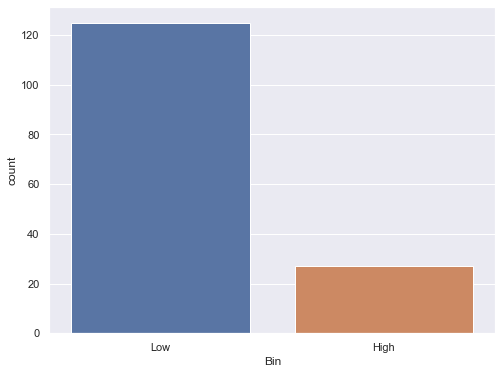

In [197]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Bin', data = y)
 
# Show the plot
plt.show()

The above plot shows the comparison of 'Low' and 'High' counts. [7]

### Task 2: Feature Selection

For feature selection, I have used 2 methods for the sake of comparison - Select K Best algorithm and Pearson correlation coefficient

### Select K Best 

In [198]:
from numpy import array
import matplotlib.pyplot as plt

In [199]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=6)
selector.fit(x, y)

SelectKBest(k=6)

In [200]:
# Displaying the scores
np.set_printoptions(precision=3)
print(selector.scores_)
print(x.columns.values)

[5.448 5.447 0.309 1.338 4.269 0.99  2.067 1.982]
['SECTION ID' 'HIGHWAY' 'SECTION' 'SECTION LENGTH' 'GROUP' 'TYPE' 'ADT'
 'AADT']


In [201]:
feature_weights = dict(zip(x.columns.values, selector.scores_))
feature_weights

{'SECTION ID': 5.448275069450755,
 'HIGHWAY': 5.447461127850749,
 'SECTION': 0.3092450124885276,
 'SECTION LENGTH': 1.3382980976909435,
 'GROUP': 4.268685064623846,
 'TYPE': 0.9902543144002058,
 'ADT': 2.0667938027990727,
 'AADT': 1.9819256511998695}

In [202]:
# Sorting the scores in descending order
feature_weights = dict(sorted(feature_weights.items(), key=lambda item: item[1], reverse=True))
feature_weights

{'SECTION ID': 5.448275069450755,
 'HIGHWAY': 5.447461127850749,
 'GROUP': 4.268685064623846,
 'ADT': 2.0667938027990727,
 'AADT': 1.9819256511998695,
 'SECTION LENGTH': 1.3382980976909435,
 'TYPE': 0.9902543144002058,
 'SECTION': 0.3092450124885276}

As per the above output, the best 6 features as per their respective scores are 'SECTION_ID', 'HIGHWAY', 'GROUP', 'ADT', 'AADT' and 'SECTION LENGTH'.

### Pearson Correlation Coefficient

In [203]:
# Correlation Matrix
x.corr()

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,GROUP,TYPE,ADT,AADT
SECTION ID,1.000000,1.000000,-0.298701,0.229075,0.176793,0.002824,-0.237485,-0.240013
HIGHWAY,1.000000,1.000000,-0.298822,0.229037,0.176748,0.002799,-0.237461,-0.239988
SECTION,-0.298701,-0.298822,1.000000,0.220175,0.286770,0.190384,-0.111076,-0.116820
SECTION LENGTH,0.229075,0.229037,0.220175,1.000000,0.420183,0.228795,-0.556548,-0.555237
GROUP,0.176793,0.176748,0.286770,0.420183,1.000000,0.242194,-0.544144,-0.544701
TYPE,0.002824,0.002799,0.190384,0.228795,0.242194,1.000000,-0.375051,-0.371385
ADT,-0.237485,-0.237461,-0.111076,-0.556548,-0.544144,-0.375051,1.000000,0.997176
AADT,-0.240013,-0.239988,-0.116820,-0.555237,-0.544701,-0.371385,0.997176,1.000000


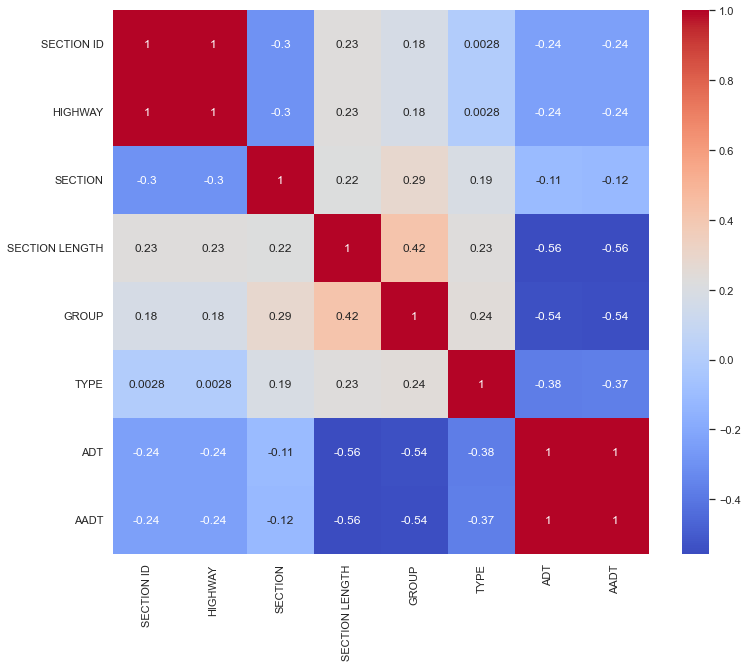

In [204]:
# Correlation Heatmap 
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

The above correlation heatmap shows the correlation of each of the features with the other features. The blue end of the color bar shows the low correlation between features. As the color gets red, it shows that the features are highly correlated. 

In [205]:
# with the following function we can select highly correlated features

def correlation(data, threshold):
    # setting the names of the correlated columns
    corr_ = set()  
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold: 
                # getting the name of column
                colname = corr_mat.columns[i]  
                corr_.add(colname)
    return corr_

In [206]:
# This will give us the numner of features that are below the threshold and can be dropped
corr_features = correlation(x, 0.7)
len(set(corr_features))

2

In [207]:
# To get the features that can be dropped  
corr_features

{'AADT', 'HIGHWAY'}

In [208]:
# Dropping the features
x_1 = x.drop(corr_features,axis=1)
x_1

,SECTION ID,SECTION,SECTION LENGTH,GROUP,TYPE,ADT
Date,,,,,,
2019-04-29,102035,35,3.050,0,0,26040.0
2019-04-29,102020,20,2.370,0,0,26668.0
2019-05-02,212010,10,7.160,2,0,1831.0
2019-05-02,102075,75,3.290,0,0,27799.0
2019-05-02,212020,20,10.230,2,0,1365.0
2019-05-02,212025,25,6.520,3,0,1220.0
2019-05-02,212027,27,7.370,2,1,420.0
2019-05-02,212027,27,7.370,2,1,406.0
2019-05-02,357020,20,7.130,2,0,835.0


### Task 4: Fitting the decision tree with 50% of train and 50% of test data¶

#### iii (a) Decision Tree

In [209]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [210]:
# splitting the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(x_1, y, random_state=42, train_size = 0.5)

In [211]:
display(X_train.shape)
display(X_test.shape) 
display(y_train.shape)
display(y_test.shape)

(76, 6)

(76, 6)

(76, 1)

(76, 1)

In [212]:
# train the decision tree classifier
clf = tree.DecisionTreeClassifier()
mymodel= clf.fit(X_train, y_train)
mymodel.score(X_test, y_test)

0.8552631578947368

In [213]:
feature_names = X_train.keys()
col_names = ['low', 'high']

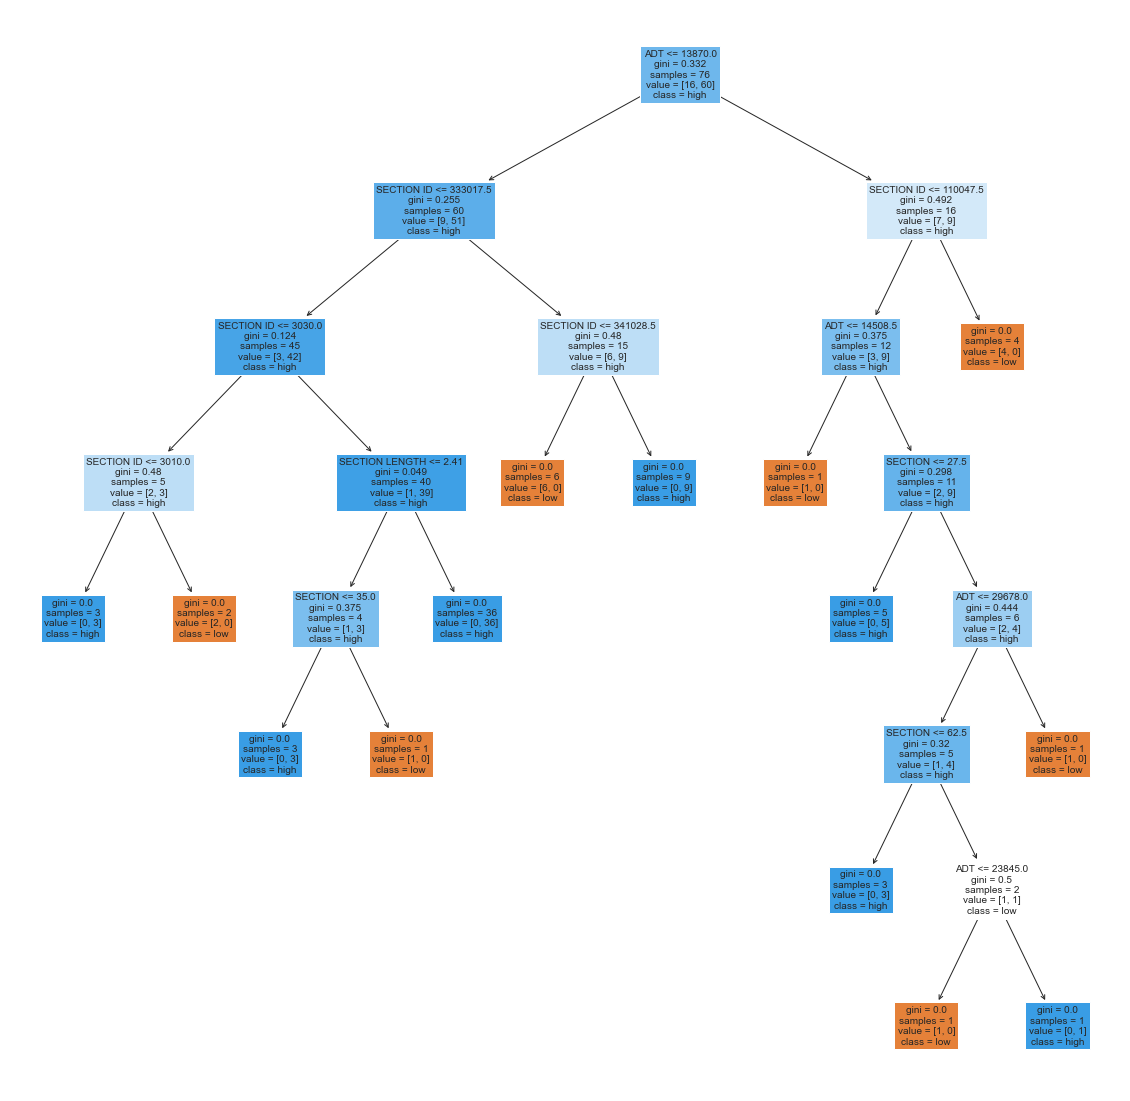

In [214]:
plt.figure(figsize=(20,20))
tree.plot_tree(mymodel, feature_names=feature_names, class_names=col_names, filled=True)
plt.show()

As per the above figure, the decision tree classifier has taken "ADT" as the root node. Going down the tree, the gini index decreases with each level, and gini index = 0 for leaf nodes (where the tree cannot be split further). 

In [215]:
y_pred = mymodel.predict(X_test)

In [216]:
# to show the probability of each prediction
mymodel.predict_proba(X_train)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

### Classification Report

In [217]:
# classifiction report for 50-50 train test split
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.50      0.55      0.52        11
         Low       0.92      0.91      0.91        65

    accuracy                           0.86        76
   macro avg       0.71      0.73      0.72        76
weighted avg       0.86      0.86      0.86        76



For 50-50 train test split, we're getting an accuracy of 88%.


#### iii (b). 10-fold cross validation

In [218]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split

In [219]:
# Taking 70-30 split for cross validation data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(x_1, y, random_state=0, test_size = 0.3)
X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape

((106, 6), (46, 6), (106, 1), (46, 1))

In [220]:
mymodel2 = clf.fit(X_train_cv, y_train_cv)

In [221]:
y_pred_cv = mymodel2.predict(X_test_cv)

In [222]:
# Got the accuracy scores for all the 10 folds of 10 fold cross validation
from sklearn.model_selection import cross_val_score
report = cross_val_score(mymodel2, X_train_cv, y_train_cv, scoring='accuracy', cv=10)
report

array([0.636, 1.   , 0.909, 0.909, 0.909, 1.   , 1.   , 1.   , 0.8  ,
       0.7  ])

In [223]:
# to get the fit_time, score_time and test_score using cross_validate module
from sklearn.model_selection import cross_validate
validations_ = cross_validate(mymodel2, X_train_cv, y_train_cv, cv=10)
validations_

{'fit_time': array([0.004, 0.005, 0.006, 0.006, 0.005, 0.004, 0.006, 0.004, 0.004,
        0.004]),
 'score_time': array([0.003, 0.003, 0.001, 0.002, 0.003, 0.002, 0.003, 0.003, 0.001,
        0.001]),
 'test_score': array([0.636, 1.   , 0.909, 0.909, 0.909, 0.818, 1.   , 0.9  , 0.8  ,
        0.7  ])}

#### Classification report and confusion matrix for 10-fold cross validation [6]

In [224]:
# to get the classification reports and confusion matrices for all the 10 folds of cross validation
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix
def classification_report_table(y_test_cv, y_pred_cv):
    print (classification_report(y_test_cv, y_pred_cv))
    print (confusion_matrix(y_test_cv, y_pred_cv))
    return accuracy_score(y_test_cv, y_pred_cv)

nested_score = cross_validate(mymodel2, X_train_cv, y_train_cv, cv=10, scoring=make_scorer(classification_report_table))
print (nested_score)


              precision    recall  f1-score   support

        High       0.50      0.67      0.57         3
         Low       0.86      0.75      0.80         8

    accuracy                           0.73        11
   macro avg       0.68      0.71      0.69        11
weighted avg       0.76      0.73      0.74        11

[[2 1]
 [2 6]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0]
 [0 8]]
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         2
         Low       1.00      0.89      0.94         9

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92 

In [225]:
feature_names_1 = x_1.keys()
target = ['low', 'high']

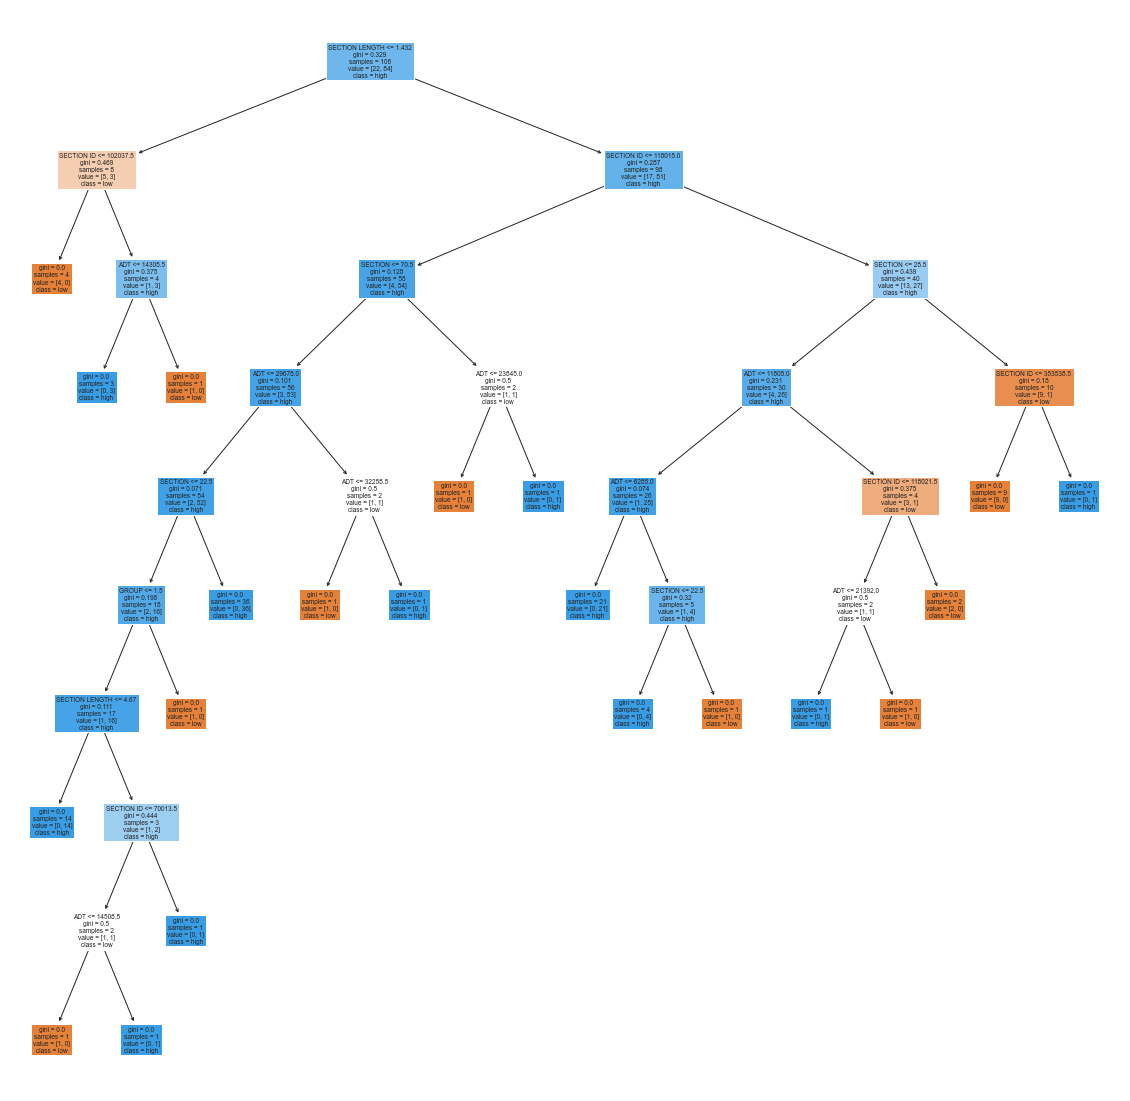

In [229]:
plt.figure(figsize=(20,20))
tree.plot_tree(mymodel2, feature_names=feature_names, class_names=target, filled=True)
plt.show()

In [230]:
kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(X_train_cv) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [231]:
# to display the 10 folds
for train_index, test_index in kf.split(X_train_cv, y_train_cv):
    print("Train:", train_index, "Test:", test_index)


Train: [ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105] Test: [ 0  1  2  3  4  5  6  7  8  9 10]
Train: [  0   1   2   3   4   5   6   7   8   9  10  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105] Test: [11 12 13 14 15 16 17 18 19 20 21]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  33  34  35  36  37  38  39  40  

The above result gives us the 10 folds

In [232]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [233]:
# Getting the scores for each fold
scores = cross_val_score(clf, x_1, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.812 0.875 0.933 1.    0.6   1.    0.6   0.933 0.667 0.8  ]


In [234]:
# Making cross validated predictions
predictions_1 = cross_val_predict(mymodel2, x_1, y, cv=10)
predictions_1

array(['Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High

In [235]:
# Overall accuracy 
accuracy = metrics.accuracy_score(y, predictions_1)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  0.8223684210526315


Above is the overall accuracy after doing the 10-fold cross validation.

### (iv) Hyperparameter tuning

In [236]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [237]:
param_dist = {"max_depth": [3, None],
              "min_samples_split": randint(1,9),
              "min_samples_leaf": randint(1, 9),
              }

clf_2 = tree.DecisionTreeClassifier()

tree_1 = RandomizedSearchCV(clf_2, param_dist)
tree_1.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023468025400>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000234668795B0>})

In [238]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_1.best_params_))
print("Best score is {}".format(tree_1.best_score_))

Tuned Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score is 0.8291666666666668


I used randomized Search CV to get the best accuracy. As per above, the model gives the best accuracy for parameters 'max_depth' =None 'min_samples_leaf'=1, 'min_samples_split'=6.

Now, I will experiment by tweaking the parameters to see how it impacts the accuracy of the model.

#### Tweaking 'max_depth'
Changing the max_depth to 2

In [239]:
clf_3 = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=6)
clf_3.fit(X_train, y_train)
clf_3.score(X_train, y_train)



0.8421052631578947

In [241]:
clf_4 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=6)
clf_4.fit(X_train, y_train)
clf_4.score(X_train, y_train)

0.9342105263157895

Chainging the max_depth to 3 increases the accuracy to 93.42%. Therefore, increasing max_depth increases the accuracy in this case. 

#### Tweaking 'min_samples_leaf'


In [242]:
clf_5 = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=6)
clf_5.fit(X_train, y_train)
clf_5.score(X_train, y_train)


0.9210526315789473

In [247]:
clf_6 = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=3, min_samples_split=6)
clf_6.fit(X_train, y_train)
clf_6.score(X_train, y_train)

0.9210526315789473

The above results shows that increasing the min_samples_leaf to 2 or 3 is not affecting the accuracy of the model.

#### Tweaking 'min_samples_split'

In [251]:
clf_7 = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5)
clf_7.fit(X_train, y_train)
clf_7.score(X_train, y_train)

0.9736842105263158

In [252]:
clf_8 = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=4)
clf_8.fit(X_train, y_train)
clf_8.score(X_train, y_train)

0.9868421052631579

In [253]:
clf_9 = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=7)
clf_9.fit(X_train, y_train)
clf_9.score(X_train, y_train)

0.9342105263157895

Above result shows that decreasing the min_samples_split increases the model accuracy. Whereas, if we increaes the min_samples_split, model accuracy goes down a bit.